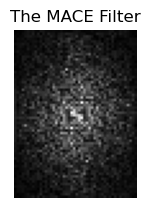

31


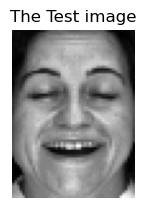

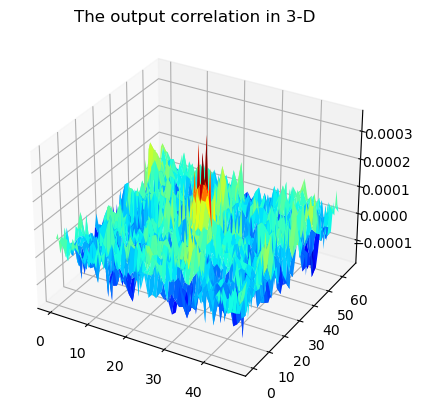

matched


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2,glob,re,random
import dask.array as da


def MACE(image_path_list):
    # Load and process the training images
    # image_path_list = [x for x in glob.glob("C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\AR_warp_zip\\test2\\*.bmp") if re.search(r'^.*\-0[1-7]\.bmp$',x)]

    # Create the X matrix
    X = []
    image_shape = (48,66)

    for i, image in enumerate(image_path_list):
        image = cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE), image_shape)
        # plt.subplot(2, 2, 1)
        # plt.imshow(image, cmap='gray')
        # plt.title('The sample of training images')
        image = np.fft.fft2(image.astype(np.float64))
        M, N = image.shape
        Z = np.reshape(image, (M * N, 1))
        X.append(Z)

    X = np.hstack(X)
    K = len(image_path_list)

    # Create the D matrix
    ASD = np.abs(X)**2
    D = np.sum(ASD, axis=1) / K

    # Create the D inverse
    D_inv = np.diag(1/D)

    # Create the U matrix
    U = np.ones((K, 1))

    # Create the complex conjugate transpose
    C = np.conj(X.T)

    # Compute the h filter, then create the H filter (MACE)
    F = np.linalg.inv(C @ D_inv @ X)
    Y = F @ U
    E = D_inv @ X
    h = E @ Y
    H = np.reshape(h, (M, N))
    plt.subplot(2, 2, 2)
    plt.imshow(np.abs(H), cmap='gray')
    plt.title('The MACE Filter')
    plt.axis('off')
    plt.show()

    return H


H = MACE([x for x in glob.glob("C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\AR_warp_zip\\test2\\*.bmp") if re.search(r'^.*\-0[1-7]\.bmp$',x)])
# Load and process the test image
test_images = [x for x in glob.glob("C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\AR_warp_zip\\test2\\*.bmp") if re.search(r'^.*\-(1[4-9]|20)\.bmp$',x)]
test_path = random.choice(test_images)
image_label = int(re.search(pattern=r'.*([0-9]{3})-[0-9]{2}\.bmp',string=test_path).group(1))
print(image_label)
test = cv2.resize(cv2.imread(test_path, cv2.IMREAD_GRAYSCALE), image_shape)
plt.subplot(2, 2, 3)
plt.imshow(test, cmap='gray')
plt.title('The Test image')
plt.axis('off')
plt.show()

# Apply the MACE filter to the test image
test_fft = np.fft.fft2(test.astype(float))
output = np.real(np.fft.ifft2(test_fft * np.conj(H)))
output = np.fft.ifftshift(output)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(output.shape[1]), np.arange(output.shape[0]))
ax.plot_surface(X, Y, output, cmap='jet')
plt.title('The output correlation in 3-D')
plt.show()

print('matched') if np.max(output)>0.0003 else print('not matched')

In [74]:
result = []

for i, image_ in enumerate(test_images):
    image = cv2.resize(cv2.imread(image_, cv2.IMREAD_GRAYSCALE), image_shape)
    test_fft = np.fft.fft2(test.astype(float))
    output = np.real(np.fft.ifft2(test_fft * np.conj(H)))
    output = np.fft.ifftshift(output)
    image_label = int(re.search(pattern=r'.*([0-9]{3})-[0-9]{2}\.bmp',string=image_).group(1))
    result.append(1 if np.max(output)>0.0003 else 0)

print(np.sum(result)/len(test_images))

1.0


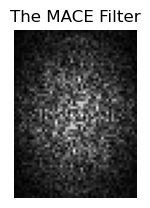

42


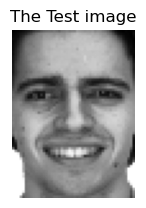

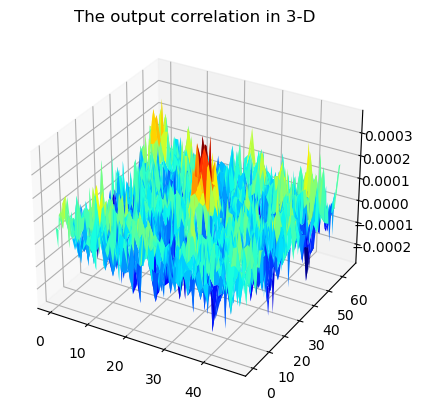

matched


In [79]:
H = MACE([x for x in glob.glob("C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\AR_warp_zip\\test2\\*.bmp") if re.search(r'^.*\-(0[1-9]|1[0-3])\.bmp$',x)])
# Load and process the test image
test_images = [x for x in glob.glob("C:\\Users\\Koorosh\\Desktop\\DIP_HW3\\AR_warp_zip\\test2\\*.bmp") if re.search(r'^.*\-(1[4-9]|2[0-6])\.bmp$',x)]
test_path = random.choice(test_images)
image_label = int(re.search(pattern=r'.*([0-9]{3})-[0-9]{2}\.bmp',string=test_path).group(1))
print(image_label)
test = cv2.resize(cv2.imread(test_path, cv2.IMREAD_GRAYSCALE), image_shape)
plt.subplot(2, 2, 3)
plt.imshow(test, cmap='gray')
plt.title('The Test image')
plt.axis('off')
plt.show()

# Apply the MACE filter to the test image
test_fft = np.fft.fft2(test.astype(float))
output = np.real(np.fft.ifft2(test_fft * np.conj(H)))
output = np.fft.ifftshift(output)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(output.shape[1]), np.arange(output.shape[0]))
ax.plot_surface(X, Y, output, cmap='jet')
plt.title('The output correlation in 3-D')
plt.show()

print('matched') if np.max(output)>0.0003 else print('not matched')

In [80]:
result = []

for i, image_ in enumerate(test_images):
    image = cv2.resize(cv2.imread(image_, cv2.IMREAD_GRAYSCALE), image_shape)
    test_fft = np.fft.fft2(test.astype(float))
    output = np.real(np.fft.ifft2(test_fft * np.conj(H)))
    output = np.fft.ifftshift(output)
    image_label = int(re.search(pattern=r'.*([0-9]{3})-[0-9]{2}\.bmp',string=image_).group(1))
    result.append(1 if np.max(output)>0.0003 else 0)

print(np.sum(result)/len(test_images))

1.0
